<a href="https://colab.research.google.com/github/Asahi-UX/visual-ref/blob/main/Seaborn_and_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Seaborn

In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/magic.html
/content/heart.csv
/content/partizan.xlsx
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/logs/2025.04.09/13.37.51.026068.log
/content/.config/logs/2025.04.09/13.37.59.170421.log
/content/.config/logs/2025.04.09/13.38.00.354311.log
/content/.config/logs/2025.04.09/13.38.09.438379.log
/content/.config/logs/2025.04.09/13.37.30.549742.log
/content/.config/logs/2025.04.09/13.38.08.751788.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [ ]:
df = pd.read_csv('/content/heart.csv', sep = ',')
df['Cholesterol'] = np.where(df['Cholesterol']==0, np.nan, df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP']==0, np.nan, df['RestingBP'])
df['FastingBS'] = np.where(df['FastingBS']==0, np.nan, df['FastingBS'])

Seaborn также реализован на matplotlib. Outofbox решение для построения визуализаций.

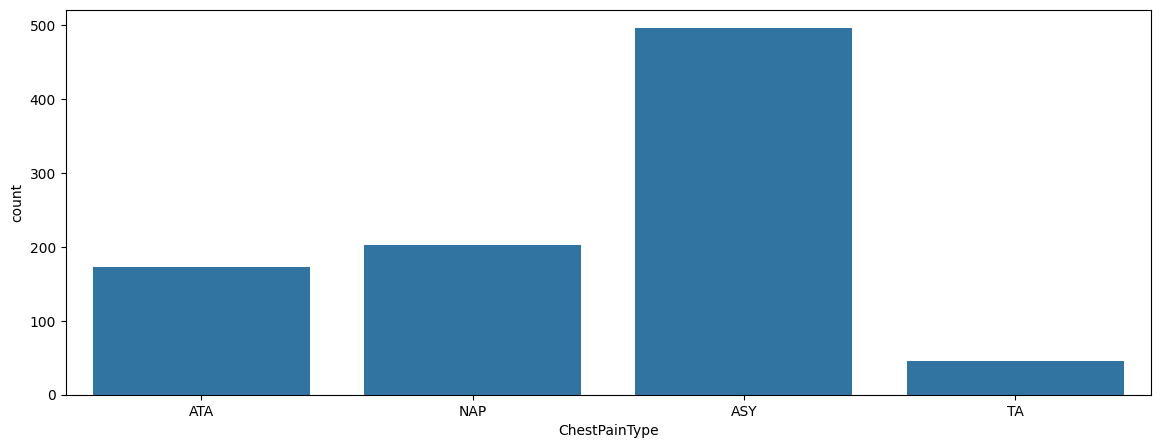

In [ ]:
fig = plt.figure(figsize= (14,5))
sns.countplot(x =  df['ChestPainType'])
#pandas bar = seaborn countplot
#Делается намного проще, нет нужды в агрегации с помощью value_counts
plt.show()

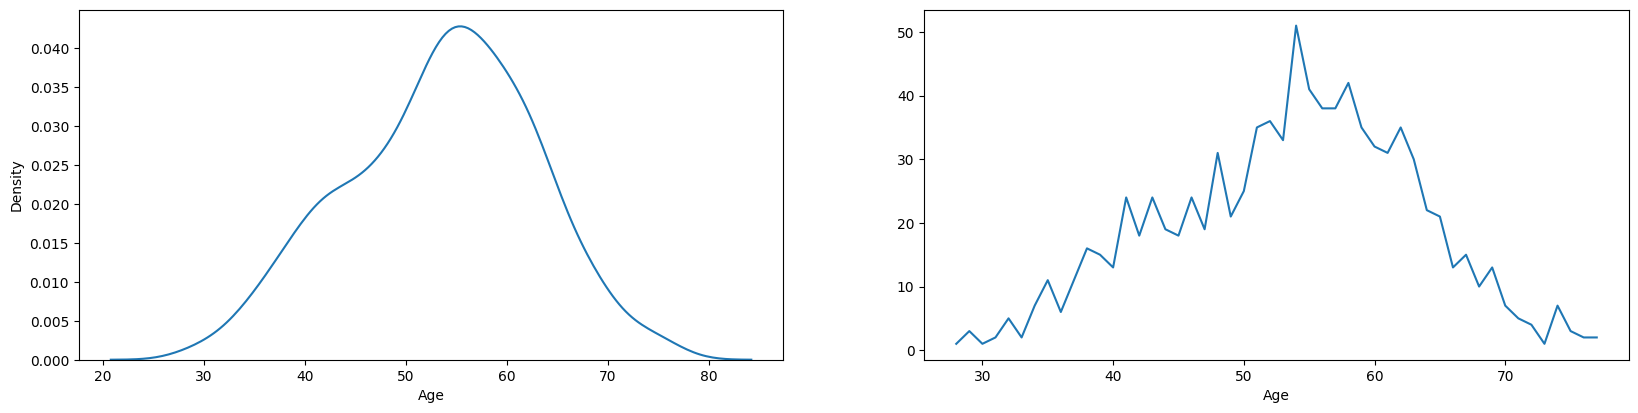

In [ ]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age.dropna())
#В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222)
df['Age'].value_counts().sort_index().plot.line()
plt.show()

<ipython-input-11-a4bed08dd00f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color='r',shade=False)


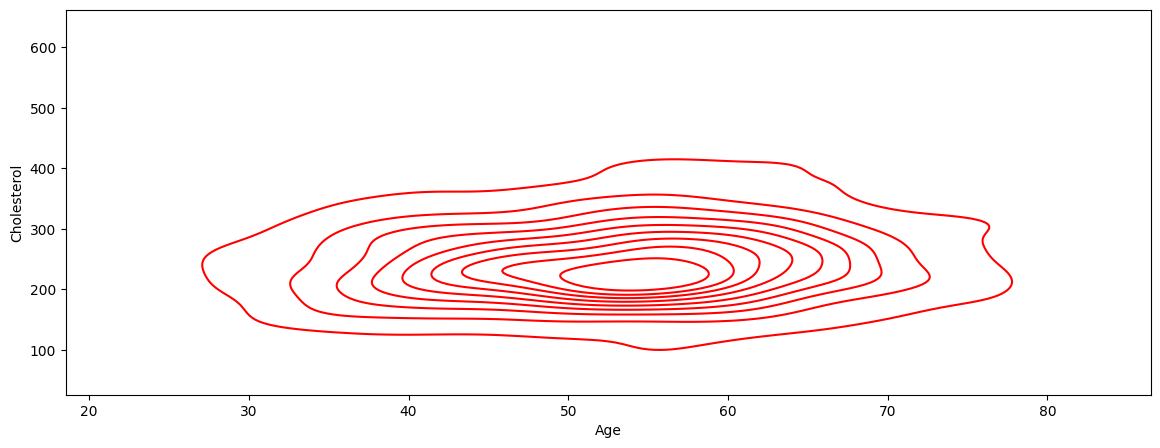

In [ ]:
fig = plt.figure(figsize= (14,5))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color='r',shade=False)
plt.show()

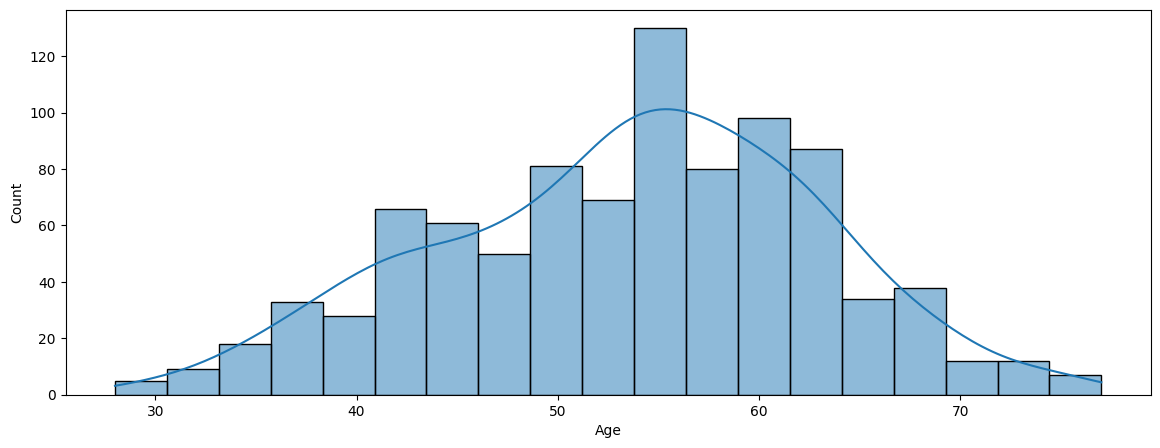

In [ ]:
#Аналог гистограммы
fig = plt.figure(figsize= (14,5))
sns.histplot(df['Age'],kde = True)
plt.show()

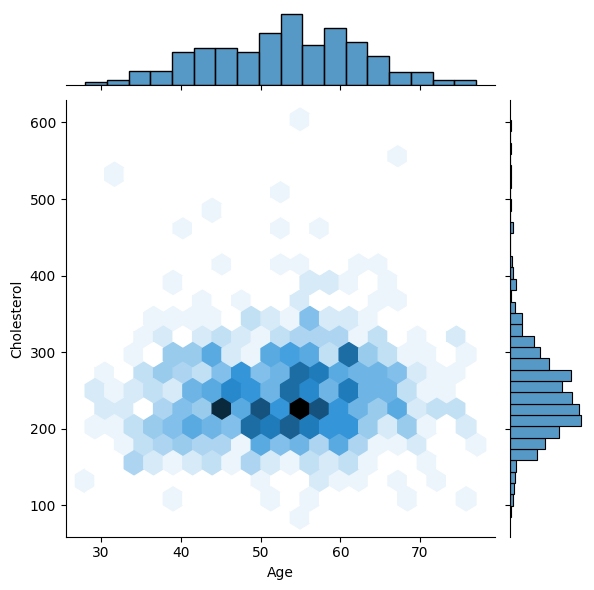

In [ ]:
#Аналог scatterplot
sns.jointplot(x='Age', y='Cholesterol', data=df, kind = 'hex',gridsize=20)
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

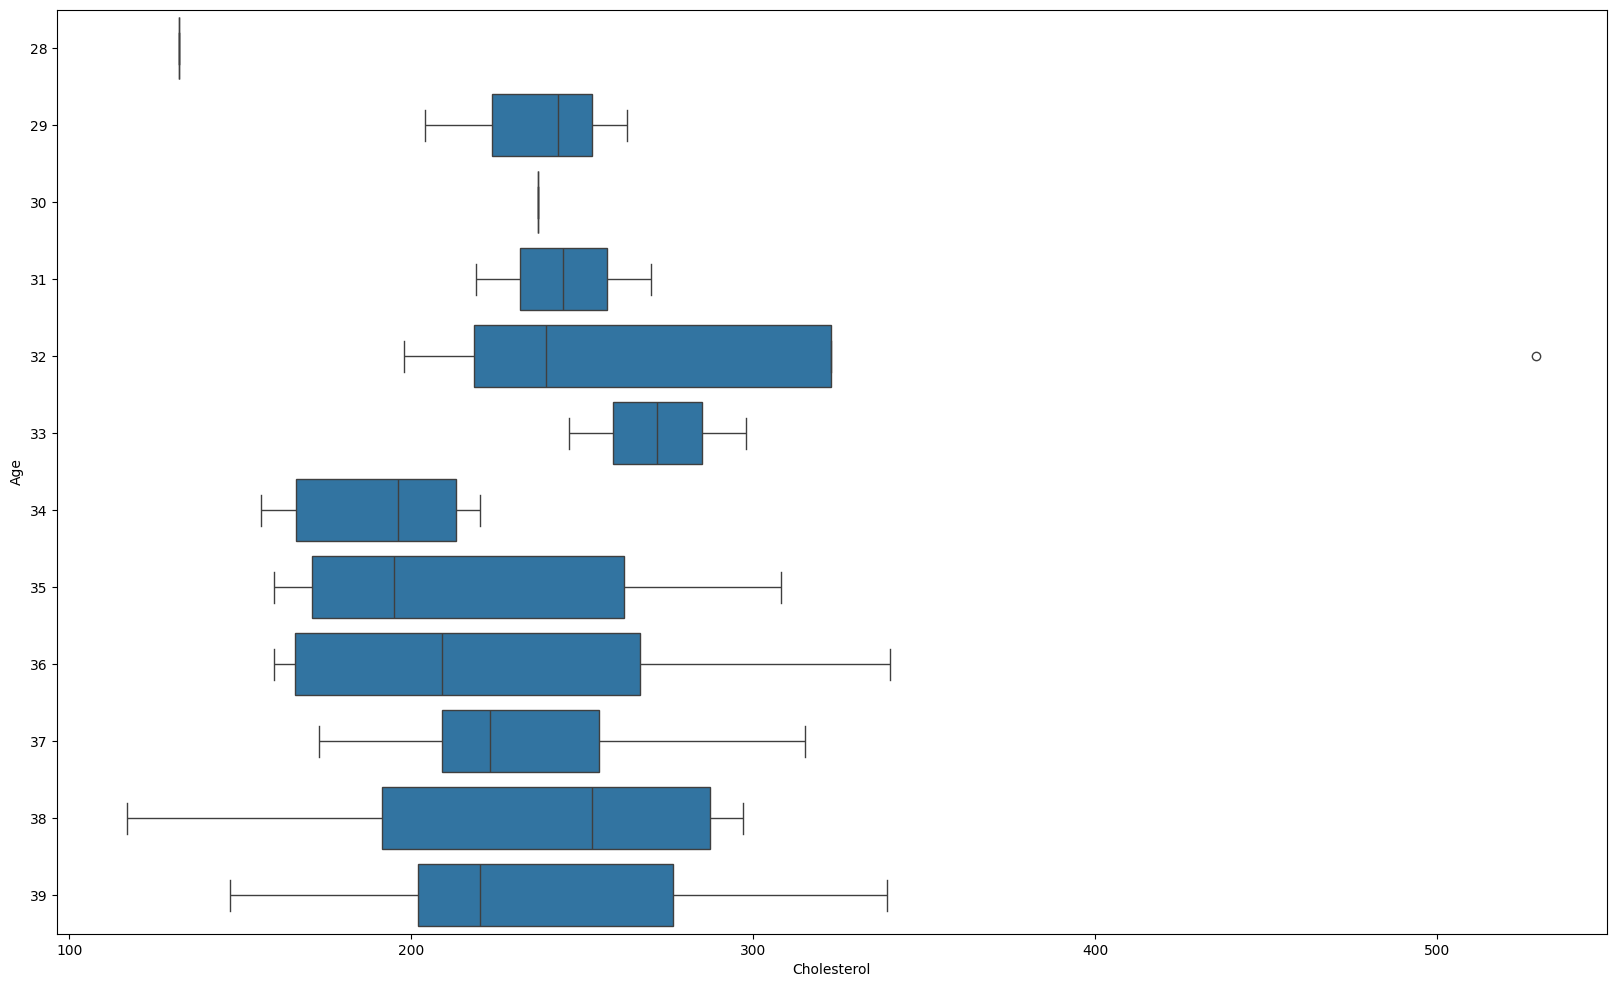

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(y="Age", x="Cholesterol", data=df[df.Age.isin(np.arange(20,40,1))], orient="h")

<Axes: xlabel='Sex', ylabel='MaxHR'>

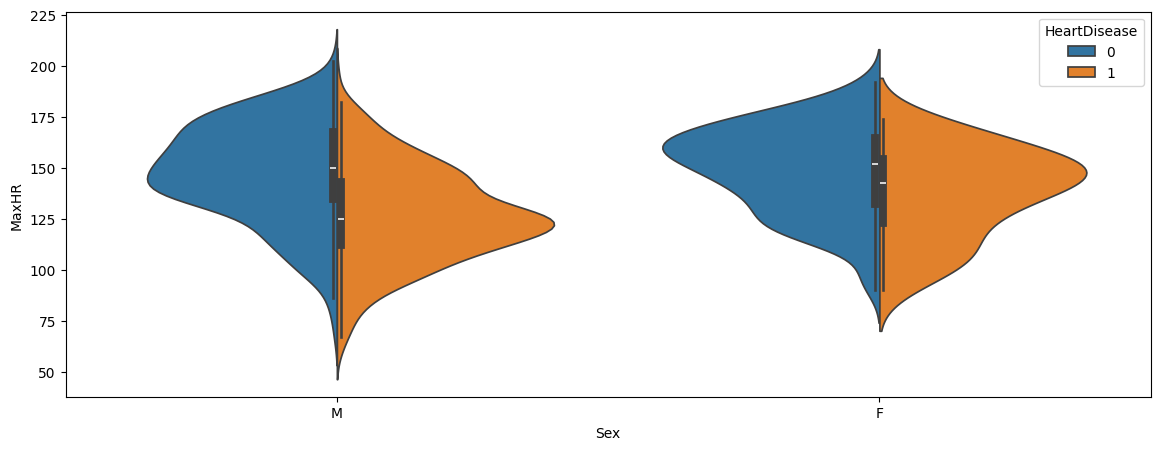

In [ ]:
fig = plt.figure(figsize= (14,5))
sns.violinplot(y="MaxHR", x="Sex",hue = 'HeartDisease', split = True, data=df)

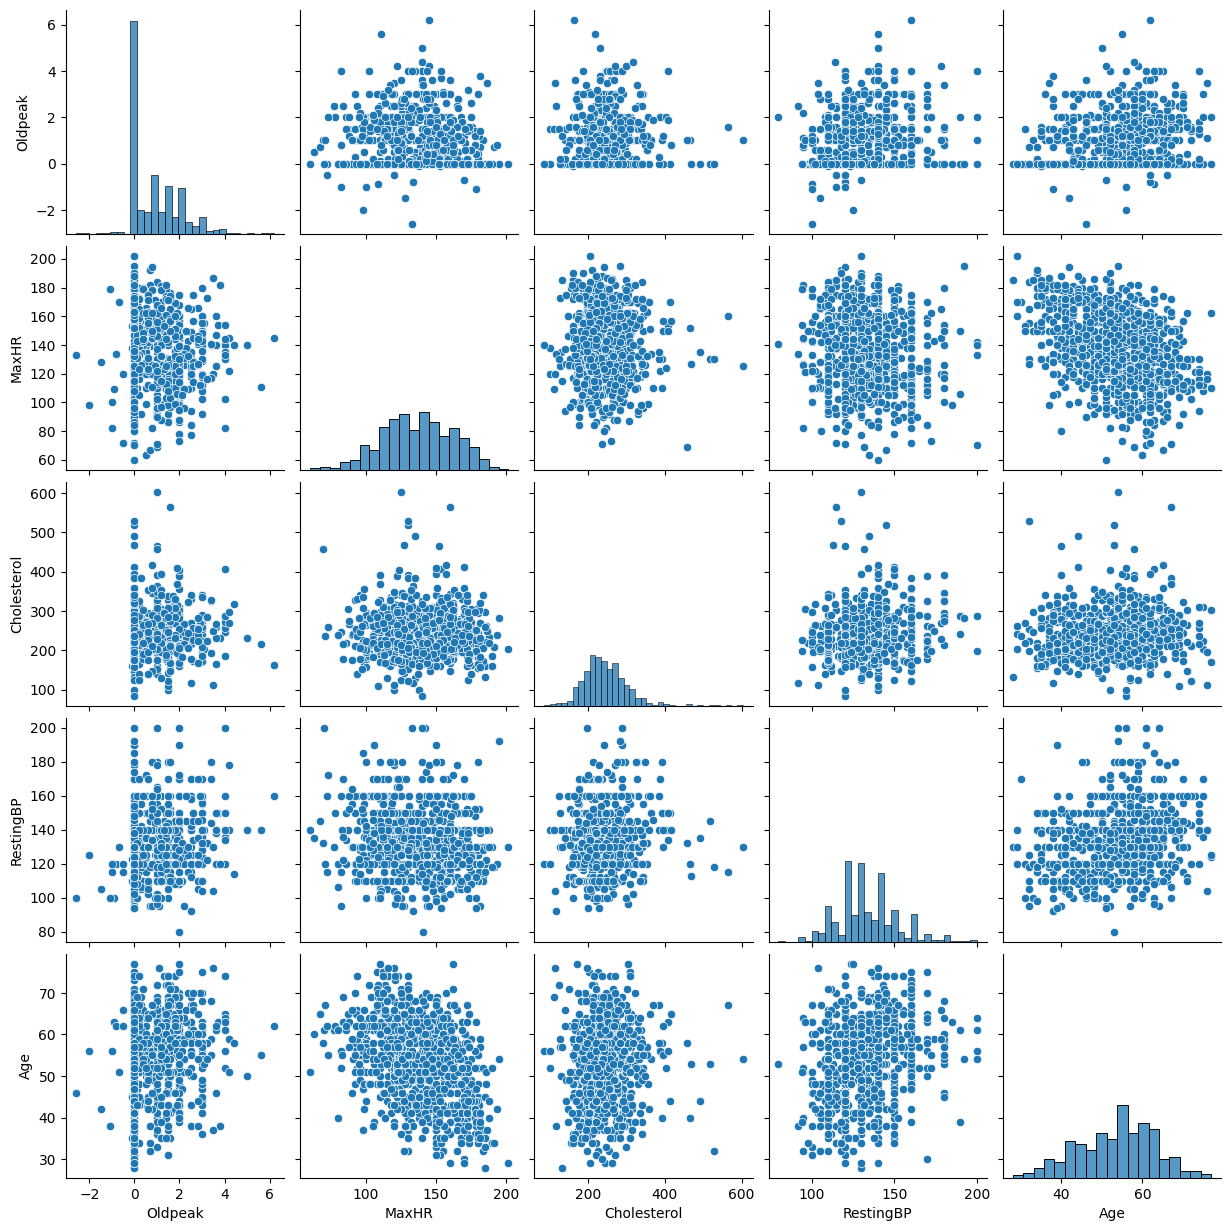

In [ ]:
cols = ['Oldpeak', 'MaxHR',  'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(df[cols])

In [ ]:
#Корреляция признаков
df[cols].dropna().corr()

,Oldpeak,MaxHR,Cholesterol,RestingBP,Age
Oldpeak,1.000000,-0.259533,0.058488,0.198575,0.286006
MaxHR,-0.259533,1.000000,-0.019856,-0.125774,-0.382112
Cholesterol,0.058488,-0.019856,1.000000,0.095939,0.058758
RestingBP,0.198575,-0.125774,0.095939,1.000000,0.259865
Age,0.286006,-0.382112,0.058758,0.259865,1.000000


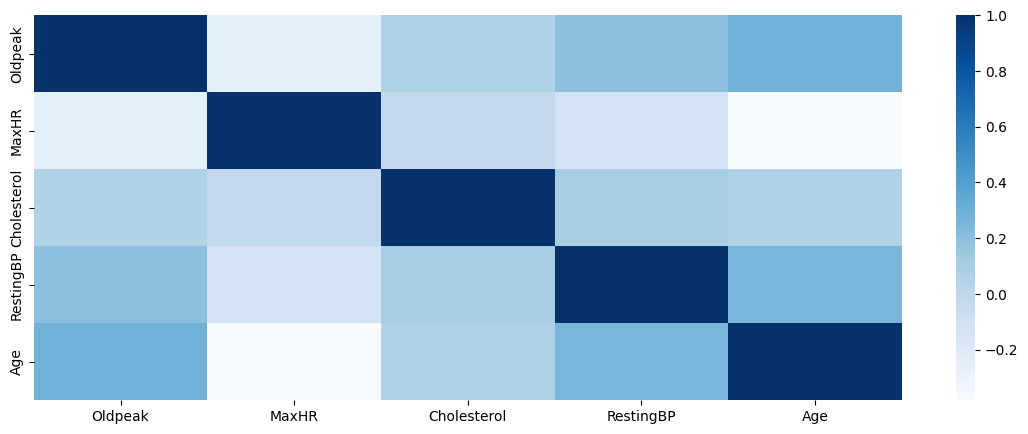

In [ ]:
#Тепловая карта
fig = plt.figure(figsize= (14,5))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')
plt.show()

### Folium

In [ ]:
import folium
from folium import plugins

In [ ]:
partizan = pd.read_excel('/content/partizan.xlsx')
partizan.tail()

,chain_name,lon,lat,orders
30,Zvjezda,37.718238,55.794452,4
31,Amazonija,37.748619,55.791744,5
32,Spasibo,37.728523,55.818736,0
33,Gurman_msk,37.734201,55.783089,0
34,Super_Papas,37.751179,55.780795,0


In [ ]:
lats = list(partizan.lat)
longs = list(partizan.lon)
places=[[x[0],x[1]] for x in zip(lats,longs)]

m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=13)

plugins.MarkerCluster(places).add_to(m)
# plugins.BoatMarker(places[0]).add_to(m)
# plugins.FastMarkerCluster(places).add_to(m)

m

### Plotly

In [ ]:
import plotly.express as px
import plotly as py

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="size", facet_col="sex",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl")
fig.show()

In [ ]:
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [ ]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

In [ ]:
py.offline.plot(fig, filename = 'magic.html', auto_open=False)

'magic.html'